In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

MIN_MATCH_COUNT=10
# Read the images which are consecutive frames
img1 = cv2.imread('./frames/frame_0.jpg', 0)
img2 = cv2.imread('./frames/frame_1.jpg', 0)
# Initiate SIFT detector
feat_detect = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
key1, output1 = feat_detect.detectAndCompute(img1, None)
key2, output2 = feat_detect.detectAndCompute(img2, None)
# parameters for FLANN matcher
FLANN_INDEX_KDTREE = 1
index_params = {'algorithm':FLANN_INDEX_KDTREE, 'trees':5}
search_params = {'checks':50}
# Initiate FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)
# Match the descriptors
matches = flann.knnMatch(output1, output2, k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

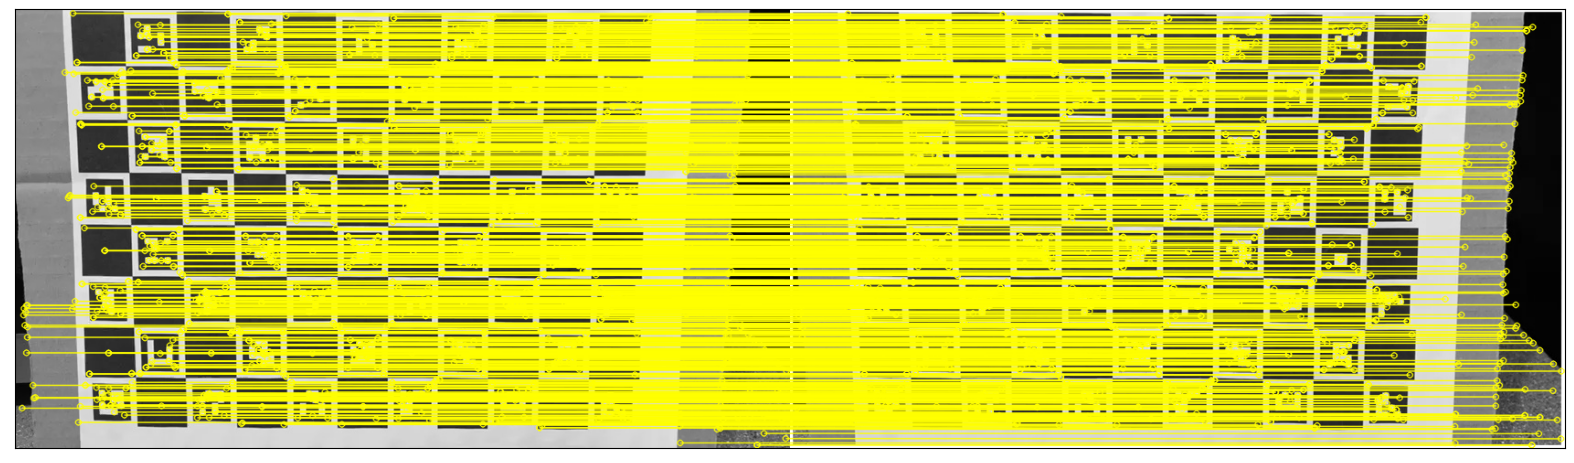

In [10]:
# If enough matches are found, we extract the locations of matched keypoints in both the images
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ key1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ key2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

# Draw the matches
draw_params = dict(matchColor = (255,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,key1,img2,key2,good,None,**draw_params)
plt.rcParams["figure.figsize"]=(20,20)
plt.imshow(img3, 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
# Priting Homography Matrix
print('Homography Matrix')
print(M)

[[ 1.00029804e+00  1.48951014e-05 -1.48055486e-02]
 [ 1.45150402e-04  9.99987691e-01  4.50513422e-01]
 [ 2.47519362e-07  1.78500331e-07  1.00000000e+00]]
